## Problem Set 5: Bias of an AR(1) Process with Julia

Victoria Gregory, N14207660

3/7/2016

*Plots the bias of an AR(1) process for a given set of coefficients and sample sizes.*

For this assignment, I translated the code I used last week with Python into Julia. First, I define a function that simulates an AR(1) process with a given coefficient, intercept, sample size, and vector of error terms. I include the error term vector as an input because later on I draw a lot of them all at once, which is faster than drawing them as I go.

In [2]:
function AR1_sim(alpha,beta,n,randomvec)
    x = zeros(n)
    x[1] = beta/(1-alpha)
    for i=2:n
        x[i] = beta + alpha*x[i-1] + randomvec[i-1]
    end
    return x
end

AR1_sim (generic function with 1 method)

Next, I define a function that computes the bias of an AR(1) for a given coefficient, intercept, sample size, and simulation length. It calls the `AR1_sim` function defined above for each bootstrapped sample. Then, to compute the estimate of the coefficient, it uses running sums to compute the covariance and variance terms. This was very fast in the Python homework last week, so I kept it here.

In [8]:
function bias_AR1(alpha,beta,n,Nsim)
    estimates = zeros(Nsim)
    n = Int(n)
    randommat = zeros(n,Nsim)
    randn!(randommat)
    for b=1:Nsim
        randomvec = randommat[:,b]
        AR1 = AR1_sim(alpha,beta,n,randomvec)
        covsum = 0
        varsum = 0
        ARmean = mean(AR1)
        for t=1:n-1
            covterm = (AR1[t] - ARmean)*(AR1[t+1] - ARmean)
            varterm = (AR1[t] - ARmean)^2
            covsum = covterm + covsum
            varsum = varterm + varsum
        end
        estimates[b] = covsum/varsum
    end
    bias = my_mean(estimates) - alpha
end

bias_AR1 (generic function with 1 method)

Now, I'm just setting up the parameters for which we want to compute the bias.

In [9]:
alphas = [0.5, 0.6, 0.7, 0.8, 0.9];
ns = linspace(50,500,10);
Nsim = 10000;
biases = zeros(length(alphas),length(ns));

Looping through the parameter combinations defined above and calling the `bias_AR1` function...

In [11]:
@time for n=1:length(ns)
    for a=1:length(alphas)
        biases[a,n] = bias_AR1(alphas[a],1,ns[n],Nsim)
    end
end

 10.073763 seconds (551.95 M allocations: 11.388 GB, 12.53% gc time)


Now, make the plot.

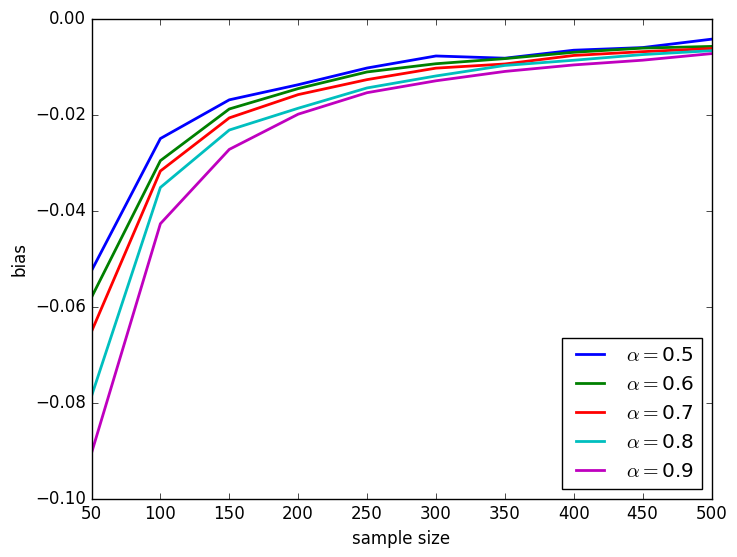

PyObject <matplotlib.text.Text object at 0x325d3fb50>

In [51]:
using PyPlot

for a=1:length(alphas)
    current_label = string(L"$\alpha=$", alphas[a])
    plot(ns, vec(biases[a,:]), linewidth=2.0, label=current_label)
end
legend(loc="lower right")
xlabel("sample size")
ylabel("bias")

We get the same result as last week: that the bias is more pronounced for smaller sample sizes and larger $\alpha$'s.